In [1]:
%run "/home/usriniva/uller_modified/discrete_time/Hanna_simu/simulation/impport_packages.ipynb"    #import all necessary packages - numpy, pandas etc


In [2]:
# Folder path
folder_path = "/home/usriniva/uller_modified/discrete_time/Hanna_simu/results/epi"
dim_objnames_epi= {}

for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith(".pkl"):
        
        file_path = os.path.join(folder_path, filename)
        print(f"Loading: {filename}")
        
        # Load the pickle file
        with open(file_path, "rb") as file:
            data = pickle.load(file)
            
        nof_dims = re.findall(r'[0-9]+', filename)[0]
        name= f'epi_{nof_dims}'
        dim_objnames_epi[name] = data
        
        print(f"Loaded {filename} into {name}")

Loading: results_dim1.pkl
Loaded results_dim1.pkl into epi_1
Loading: results_dim10.pkl
Loaded results_dim10.pkl into epi_10
Loading: results_dim2.pkl
Loaded results_dim2.pkl into epi_2
Loading: results_dim25.pkl
Loaded results_dim25.pkl into epi_25
Loading: results_dim35.pkl
Loaded results_dim35.pkl into epi_35
Loading: results_dim5.pkl
Loaded results_dim5.pkl into epi_5


In [3]:
globals().update(dim_objnames_epi) # neat way to unpack variables

# Sort the keys numerically by extracting the number from each name
sorted_epi_keys = sorted(dim_objnames_epi.keys(), key=lambda x: int(re.findall(r'\d+', x)[0]))


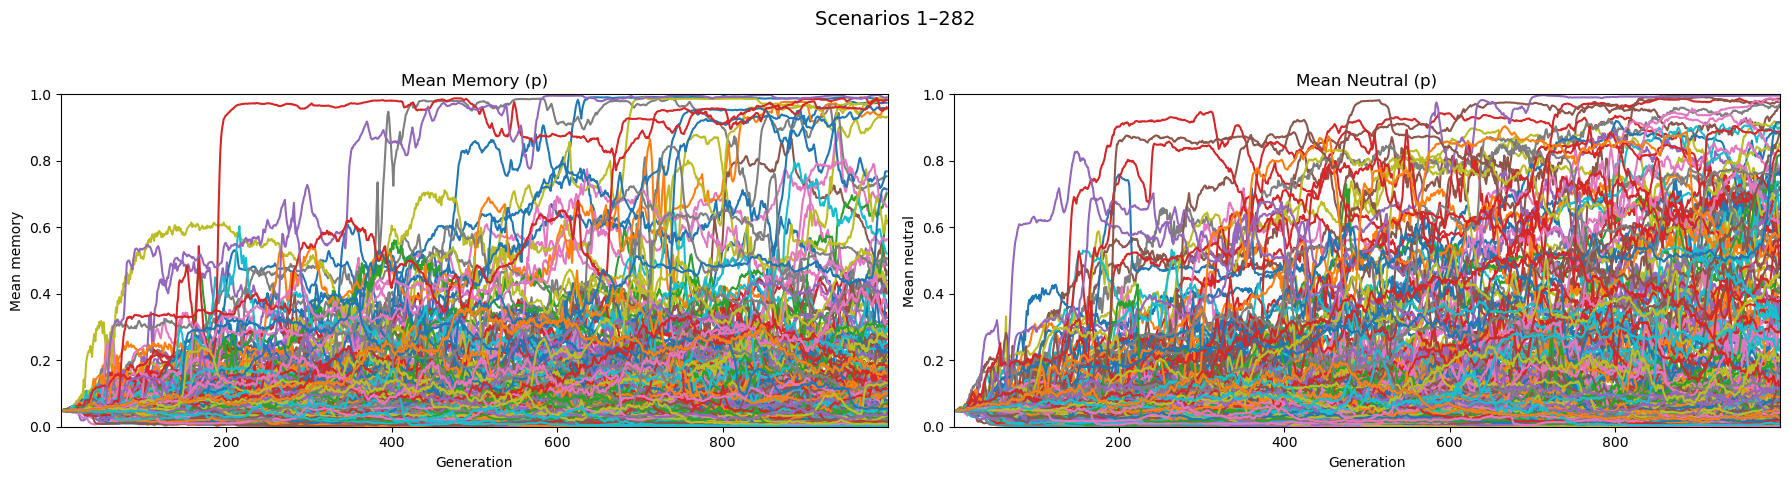

In [10]:
data = epi_10
start = 1

# Extract variables
meanmemory_p = data['meanmemory_p'][:, :-1]
meanneutral_p = data['meanneutral_p'][:, :-1]


nof_scenarios = meanmemory_p.shape[0]
maxgen = meanmemory_p.shape[1]

# Create figure once (outside loop)
fig, ax = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

# Loop over scenarios
for i in range(start, nof_scenarios):  
    # Left plot: mean memory
    ax[0].plot(meanmemory_p[i, :])

    # Right plot: mean neutral
    ax[1].plot(meanneutral_p[i, :])

# Add labels, limits, and legends once
ax[0].set_title("Mean Memory (p)")
ax[0].set_ylabel("Mean memory")
ax[0].set_xlabel("Generation")
ax[0].set_xlim(1, maxgen)
ax[0].set_ylim(0, 1)

ax[1].set_title("Mean Neutral (p)")
ax[1].set_ylabel("Mean neutral")
ax[1].set_xlabel("Generation")
ax[1].set_xlim(1, maxgen)
ax[1].set_ylim(0, 1)

fig.suptitle(f"Scenarios {start}–{nof_scenarios - 1}", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
